In [ ]:
import googleapiclient.discovery
import pandas as pd
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Masukkan API Key YouTube Data API Anda
API_KEY = "***************"
VIDEO_ID = "bzibFHJszuQ"

In [ ]:
# Membuat layanan YouTube API
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=API_KEY)

def get_comments(video_id):
    """Mengambil komentar dari video YouTube dan waktu kemunculannya."""
    comments = []
    times = []

    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100000  # Batas maksimum per permintaan
    )

    while request:
        response = request.execute()

        for item in response.get("items", []):
            comment = item["snippet"]["topLevelComment"]["snippet"]
            comments.append(comment["textDisplay"])
            times.append(comment["publishedAt"])

        # Melanjutkan ke halaman berikutnya jika ada
        request = youtube.commentThreads().list_next(request, response)

    return comments, times

In [ ]:
# Mengambil komentar dan waktu
comments, times = get_comments(VIDEO_ID)

In [ ]:
# Membuat DataFrame untuk analisis
data = pd.DataFrame({
    "Comment": comments,
    "PublishedAt": times
})

In [ ]:
# Konversi waktu ke format datetime dan hapus timezone
data["PublishedAt"] = pd.to_datetime(data["PublishedAt"]).dt.tz_localize(None)

In [ ]:
# Simpan ke file Excel (opsional)
data.to_excel("youtube_comments.xlsx", index=False)
print(data.head())

                                             Comment         PublishedAt
0  Turkey is against any Kurdish autonomy wheneve... 2024-12-21 03:21:29
1  Mixed fighting I hate US fluence in the Middle... 2024-12-20 23:13:40
2  Terrorist turkey committing genocide a Kurdish... 2024-12-20 22:09:24
3  Assad is in Russia now Syrians are free. Celeb... 2024-12-20 21:01:46
4  Long live Kurdistan.. support from India n Hin... 2024-12-20 20:34:52


In [ ]:
# Membaca data dari file Excel
try:
    data = pd.read_excel("youtube_comments.xlsx")
except FileNotFoundError:
    print("File 'youtube_comments.xlsx' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()

In [ ]:
# Mengonversi kolom 'PublishedAt' ke tipe data datetime jika belum
if not pd.api.types.is_datetime64_any_dtype(data["PublishedAt"]):
    data["PublishedAt"] = pd.to_datetime(data["PublishedAt"])

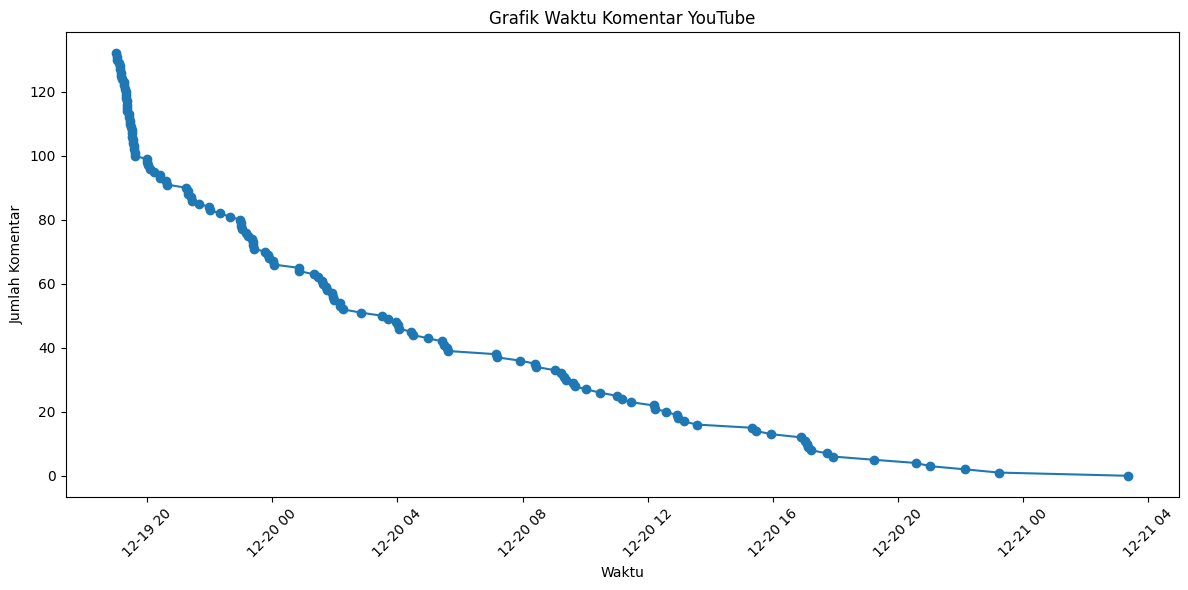

In [ ]:
# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(data["PublishedAt"], range(len(data)), marker='o', linestyle='-')
plt.xlabel("Waktu")
plt.ylabel("Jumlah Komentar")
plt.title("Grafik Waktu Komentar YouTube")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak agar label tidak tumpang tindih
plt.show()

In [ ]:
def count_emoticons(text):
    # Handle non-string values by converting them to strings
    if not isinstance(text, str):
        text = str(text)  # Convert to string if not already

    # Gunakan ekspresi reguler untuk mencocokan emoticon umum
    emoticons = re.findall(r'[^\w\s,]', text)  # Mencari karakter selain huruf, angka, spasi, dan koma
    return emoticons

In [ ]:
# Membaca data dari file Excel
try:
    data = pd.read_excel("youtube_comments.xlsx")
except FileNotFoundError:
    print("File 'youtube_comments.xlsx' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()

# Buat kolom baru untuk menyimpan daftar emoticon
data['Emoticons'] = data['Comment'].apply(count_emoticons)

In [ ]:
# Gabungkan semua daftar emoticon menjadi satu daftar
all_emoticons = [emoticon for sublist in data['Emoticons'] for emoticon in sublist]

# Hitung frekuensi setiap emoticon
emoticon_counts = pd.Series(all_emoticons).value_counts()

In [ ]:
# Tampilkan 10 emoticon teratas
print("\n10 Emoticon Teratas:")
print(emoticon_counts.head(10))


10 Emoticon Teratas:
.    151
?     27
!     23
;     21
&     21
#     17
😂      9
🦃      9
’      9
❤      9
Name: count, dtype: int64


<ipython-input-17-282735e5c9c5>:8: UserWarning: Glyph 129411 (\N{TURKEY}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129411 (\N{TURKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


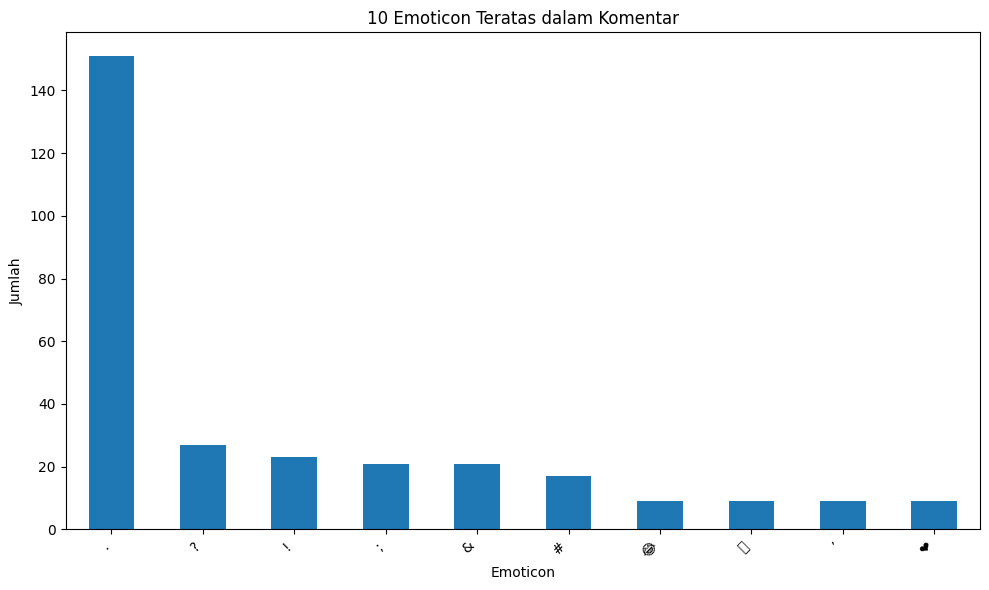

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
emoticon_counts.head(10).plot(kind='bar')
plt.xlabel("Emoticon")
plt.ylabel("Jumlah")
plt.title("10 Emoticon Teratas dalam Komentar")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Gabungkan semua komentar menjadi satu teks
all_comments = " ".join(data["Comment"].astype(str))

In [ ]:
# Membersihkan teks (opsional, tapi disarankan)
all_comments = re.sub(r'[^\w\s]', '', all_comments).lower()  # Hapus tanda baca dan ubah ke huruf kecil

In [ ]:
# Pisahkan teks menjadi kata-kata
words = all_comments.split()

In [ ]:
# Kata-kata yang akan difilter
stop_words = ["the", "and", "is", "to", "of", "dan", "sebagainya"]

In [ ]:
# Filter kata-kata
filtered_words = [word for word in words if word not in stop_words]

In [ ]:
# Hitung frekuensi kata
word_counts = Counter(filtered_words)

In [ ]:
# Tampilkan 10 kata teratas
print("\n10 Kata Teratas (setelah filter):")
print(word_counts.most_common(10))


10 Kata Teratas (setelah filter):
[('kurds', 38), ('they', 34), ('a', 33), ('you', 33), ('in', 32), ('people', 31), ('are', 31), ('turkey', 29), ('syria', 29), ('for', 24)]


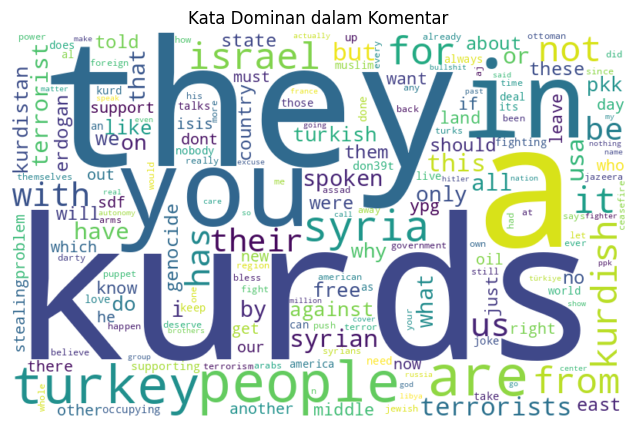

In [ ]:
# Tampilkan wordcloud
wordcloud = WordCloud(width=800, height=500, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Kata Dominan dalam Komentar")
plt.show()

In [ ]:
# Inisialisasi SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Fungsi untuk menganalisis sentimen
def analyze_sentiment(text):
    if not isinstance(text, str):
        text = str(text)
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [ ]:
# Tambahkan kolom 'Sentiment' ke DataFrame
data['Sentiment'] = data['Comment'].apply(analyze_sentiment)

In [ ]:
# Analisis sentimen keseluruhan
overall_sentiment = data['Sentiment'].mean()
print(f"\nSentimen Keseluruhan: {overall_sentiment}")


Sentimen Keseluruhan: -0.03761804511278194


In [ ]:
# Klasifikasikan sentimen
def classify_sentiment(score):
    if score >= 0.05:
        return "Positif"
    elif score <= -0.05:
        return "Negatif"
    else:
        return "Netral"

data['Sentiment_Category'] = data['Sentiment'].apply(classify_sentiment)

In [ ]:
# Hitung jumlah sentimen positif, negatif, dan netral
sentiment_counts = data['Sentiment_Category'].value_counts()
print("\nJumlah Sentimen:")
print(sentiment_counts)


Jumlah Sentimen:
Sentiment_Category
Negatif    52
Positif    48
Netral     33
Name: count, dtype: int64


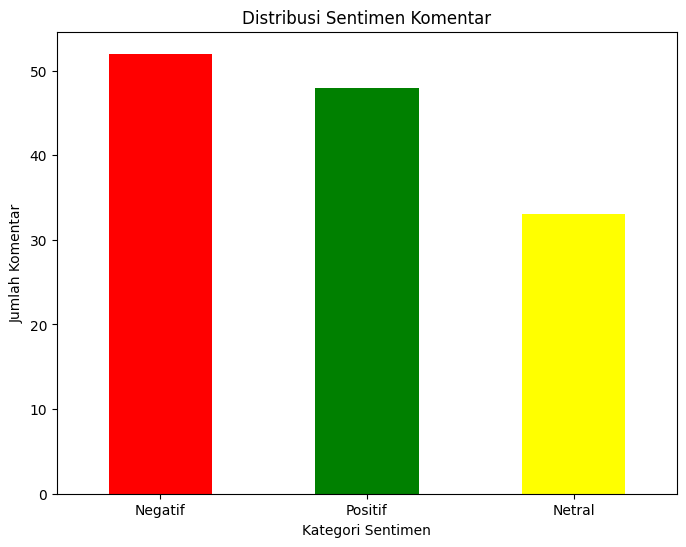

In [ ]:
# Buat diagram batang
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow'])
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Calculate sentiment percentages
total_comments = len(data)
positive_percentage = (sentiment_counts['Positif'] / total_comments) * 100
negative_percentage = (sentiment_counts['Negatif'] / total_comments) * 100
neutral_percentage = (sentiment_counts['Netral'] / total_comments) * 100

print(f"\nPersentase Sentimen Positif: {positive_percentage:.2f}%")
print(f"Persentase Sentimen Negatif: {negative_percentage:.2f}%")
print(f"Persentase Sentimen Netral: {neutral_percentage:.2f}%")


Persentase Sentimen Positif: 36.09%
Persentase Sentimen Negatif: 39.10%
Persentase Sentimen Netral: 24.81%


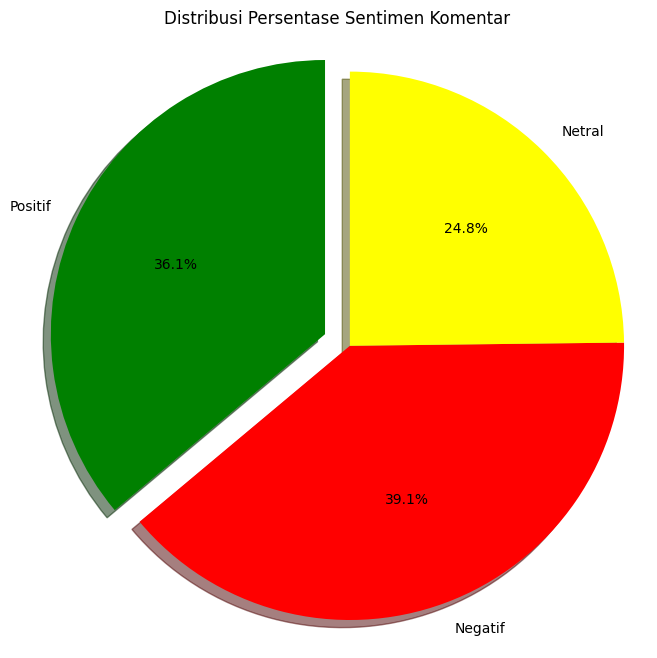

In [ ]:
# Create a pie chart for sentiment distribution
labels = ['Positif', 'Negatif', 'Netral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'yellow']
explode = (0.1, 0, 0)  # Explode the positive slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribusi Persentase Sentimen Komentar')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Number of nodes: 281
Number of edges: 1078


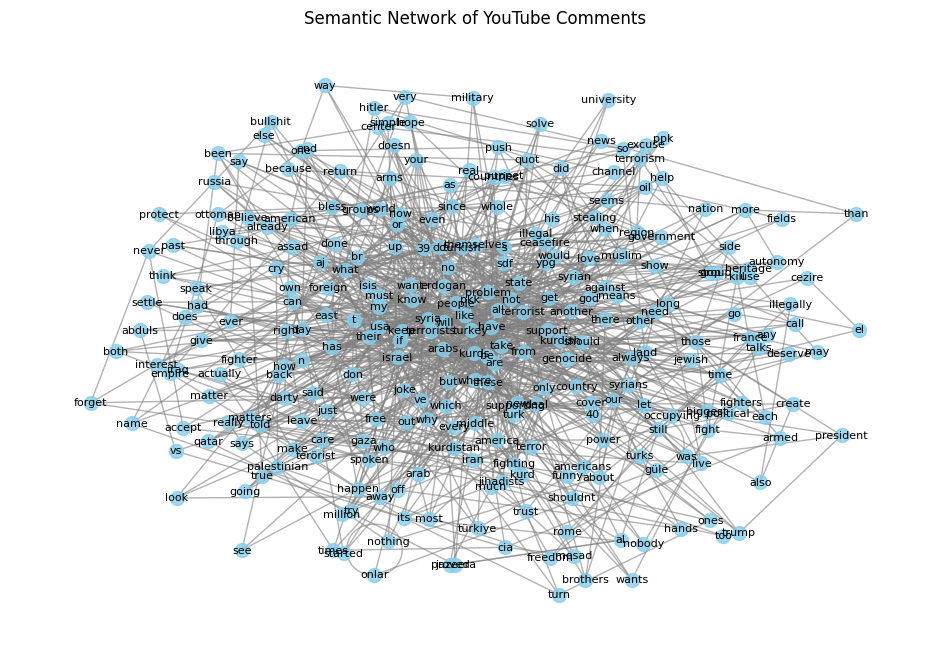

In [ ]:
#Analisis jaringan semantik

def analyze_semantic_network(comments):
    """Menganalisis jaringan semantik dari komentar."""

    # Tokenisasi komentar dan buat daftar semua kata
    all_words = []
    for comment in comments:
        # Ubah komentar menjadi string untuk menangani nilai potensial non-string
        comment_str = str(comment)
        words = re.findall(r'\b\w+\b', comment_str.lower())  # Ekstrak kata-kata
        all_words.extend(words)

    # Buatlah distribusi frekuensi kata-kata
    word_counts = Counter(all_words)

    # Saring kata-kata umum (kata-kata berhenti)
    stop_words = set(['the', 'a', 'an', 'and', 'in', 'to', 'of', 'is', 'it', 'that', 'this', 'for', 'with', 'on', 'at', 'by', 'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'us', 'them'])
    filtered_words = [word for word in all_words if word not in stop_words and word_counts[word] > 1]


    # Membangun grafik jaringan semantik
    graph = nx.Graph()
    for i in range(len(filtered_words) - 1):
        graph.add_edge(filtered_words[i], filtered_words[i + 1])

    # Menganalisis properti grafik (opsional)
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    #print("Degree Centrality:", nx.degree_centrality(graph)) #Print Degree Centrality
    #print("Betweenness Centrality:", nx.betweenness_centrality(graph))  #Print Betweenness Centrality
    #print("Closeness Centrality:", nx.closeness_centrality(graph)) #Print Closeness Centrality
    #print("Eigenvector Centrality:", nx.eigenvector_centrality(graph)) #Print Eigenvector Centrality

    # Gambarkan grafiknya
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    pos = nx.spring_layout(graph, k=0.5)  # Use spring layout for better visualization

    # Sesuaikan tampilan node dan edges
    nx.draw_networkx_nodes(graph, pos, node_size=100, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(graph, pos, font_size=8, font_family='sans-serif')

    plt.title("Semantic Network of YouTube Comments")
    plt.axis('off')  # Turn off axis display
    plt.show()

# Panggil fungsi untuk menganalisis jaringan semantik
analyze_semantic_network(data['Comment'])

In [ ]:
def analyze_semantic_network(comments):
    """Menganalisis jaringan semantik dari komentar dan mengembalikan DataFrame dengan derajat sentralitas."""

    all_words = []
    for comment in comments:
        comment_str = str(comment)
        words = re.findall(r'\b\w+\b', comment_str.lower())
        all_words.extend(words)

    word_counts = Counter(all_words)
    stop_words = set(['the', 'a', 'an', 'and', 'in', 'to', 'of', 'is', 'it', 'that', 'this', 'for', 'with', 'on', 'at', 'by', 'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'us', 'them'])
    filtered_words = [word for word in all_words if word not in stop_words and word_counts[word] > 1]

    graph = nx.Graph()
    for i in range(len(filtered_words) - 1):
        graph.add_edge(filtered_words[i], filtered_words[i + 1])

    degree_centrality = nx.degree_centrality(graph)

    # Buat DataFrame dari kamus sentralitas derajat
    degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])

    # Urutkan DataFrame berdasarkan derajat sentralitas dalam urutan menurun
    degree_df = degree_df.sort_values(by='Degree Centrality', ascending=False)

    return degree_df

# Dengan asumsi 'data' DataFrame sudah dimuat seperti pada kode asli Anda
# Ganti dengan DataFrame Anda yang sebenarnya jika berbeda
try:
    data = pd.read_excel("youtube_comments.xlsx")
except FileNotFoundError:
    print("File 'youtube_comments.xlsx' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()

degree_centrality_df = analyze_semantic_network(data['Comment'])
degree_centrality_df

,Degree Centrality
turkey,0.178571
kurds,0.178571
syria,0.175000
are,0.146429
people,0.146429
...,...
each,0.010714
abduls,0.010714
too,0.007143
talks,0.007143


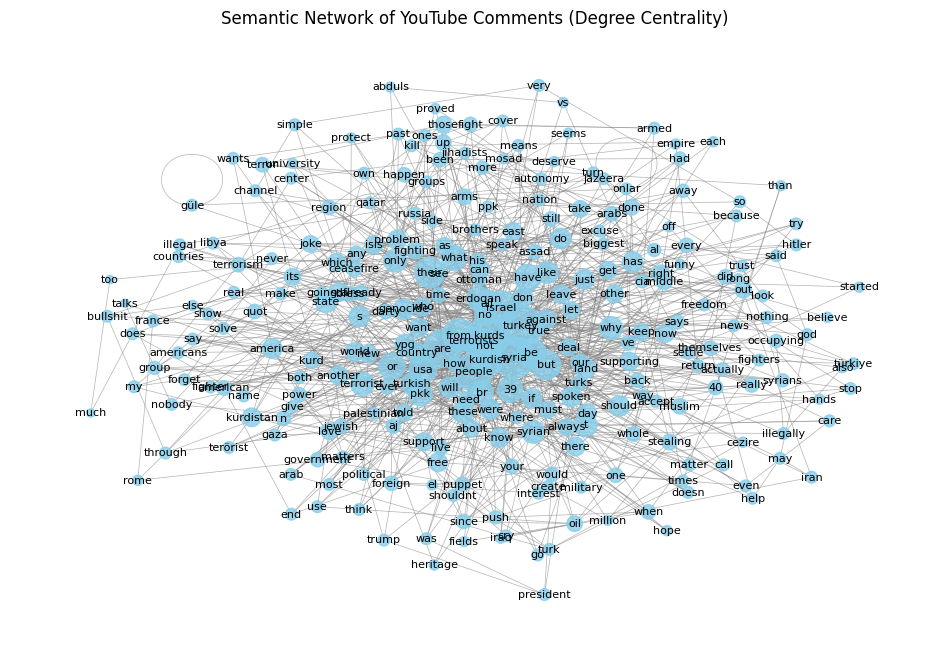

In [ ]:
def analyze_semantic_network(comments):
    all_words = []
    for comment in comments:
        comment_str = str(comment)
        words = re.findall(r'\b\w+\b', comment_str.lower())
        all_words.extend(words)

    word_counts = Counter(all_words)
    stop_words = set(['the', 'a', 'an', 'and', 'in', 'to', 'of', 'is', 'it', 'that', 'this', 'for', 'with', 'on', 'at', 'by', 'i', 'you', 'he', 'she', 'we', 'they', 'me', 'him', 'her', 'us', 'them'])
    filtered_words = [word for word in all_words if word not in stop_words and word_counts[word] > 1]

    graph = nx.Graph()
    for i in range(len(filtered_words) - 1):
        graph.add_edge(filtered_words[i], filtered_words[i + 1])

    degree_centrality = nx.degree_centrality(graph)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=50) # Peningkatan iterasi untuk tata letak yang lebih baik

    node_sizes = [v * 5000 for v in degree_centrality.values()] #Skala ukuran node berdasarkan derajat sentralitas

    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(graph, pos, width=0.5, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(graph, pos, font_size=8, font_family='sans-serif')

    plt.title("Semantic Network of YouTube Comments (Degree Centrality)")
    plt.axis('off')
    plt.show()

# Dengan asumsi 'data' DataFrame sudah dimuat
try:
    data = pd.read_excel("youtube_comments.xlsx")
except FileNotFoundError:
    print("File 'youtube_comments.xlsx' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()

analyze_semantic_network(data['Comment'])